# TEMA 2 - IA

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

## 1. Analiza data

### Utils

In [2]:
def plot_category_features(data: pd.DataFrame, features: list[str]):
    _, axs = plt.subplots(len(features), figsize=(5, 4 * len(features)))

    for i, feature in enumerate(features):
        data[feature].value_counts().plot(kind='bar', ax=axs[i])
        axs[i].xaxis.set_tick_params(rotation=45)
        axs[i].set_title(feature)
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

In [3]:
def show_boxplot(data: pd.DataFrame, features: list[str]):
    plt.clf()
    data[features].boxplot()
    plt.xticks(rotation=45)
    plt.show()

### AVC

In [4]:
# Load the data
full_data : pd.DataFrame = pd.read_csv('data/AVC_full.csv')
train_data : pd.DataFrame = pd.read_csv('data/AVC_train.csv')
test_data : pd.DataFrame = pd.read_csv('data/AVC_test.csv')

# Show the data
full_data.head()

,mean_blood_sugar_level,cardiovascular_issues,job_category,body_mass_indicator,sex,tobacco_usage,high_blood_pressure,married,living_area,years_old,chaotic_sleep,analysis_results,biological_age_index,cerebrovascular_accident
0,228.69,1,private_sector,36.6,M,ex-smoker,0,Y,City,67.0,1,503.662278,181.786614,1
1,202.21,0,entrepreneurial,NaN,F,non-smoker,0,Y,Countryside,61.0,0,503.541654,130.089915,1
2,105.92,1,private_sector,32.5,M,non-smoker,0,Y,Countryside,80.0,1,NaN,201.411374,1
3,171.23,0,private_sector,34.4,F,smoker,0,Y,City,49.0,0,411.618245,171.794024,1
4,174.12,0,entrepreneurial,24.0,F,non-smoker,1,Y,Countryside,79.0,0,450.887478,232.180890,1


In [5]:
# Data types

continuous_features : list[str] = ['mean_blood_sugar_level', 'body_mass_indicator', 'years_old', 'analysis_results', 'biological_age_index']
category_features : list[str] = ['cardiovascular_issues', 'job_category', 'sex', 'tobacco_usage', 'high_blood_pressure', 'married', 'living_area', 'chaotic_sleep', 'cerebrovascular_accident']


### 1.1 Afisare atribute continue

In [6]:
display(full_data[continuous_features].describe())

,mean_blood_sugar_level,body_mass_indicator,years_old,analysis_results,biological_age_index
count,5110.000000,4909.000000,5110.000000,4599.000000,5110.000000
mean,106.147677,28.893237,46.568665,323.523446,134.784256
std,45.283560,7.854067,26.593912,101.577442,50.399352
min,55.120000,10.300000,0.080000,104.829714,-15.109456
25%,77.245000,23.500000,26.000000,254.646209,96.710581
50%,91.885000,28.100000,47.000000,301.031628,136.374631
75%,114.090000,33.100000,63.750000,362.822769,172.507322
max,271.740000,97.600000,134.000000,756.807975,266.986321


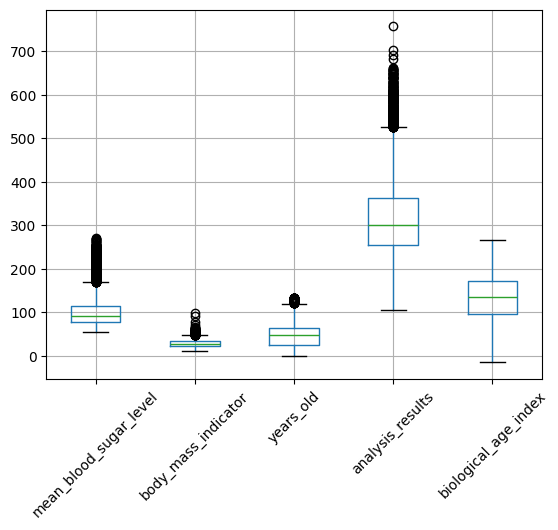

In [7]:
show_boxplot(full_data, continuous_features)

### 1.2 Afisare atribute discrete

In [8]:
display(pd.DataFrame({'count': full_data[category_features].count(),
                      'unique': full_data[category_features].nunique()}))

,count,unique
cardiovascular_issues,5110,2
job_category,5110,5
sex,5110,2
tobacco_usage,5110,4
high_blood_pressure,5110,2
married,4599,2
living_area,5110,2
chaotic_sleep,5110,2
cerebrovascular_accident,5110,2


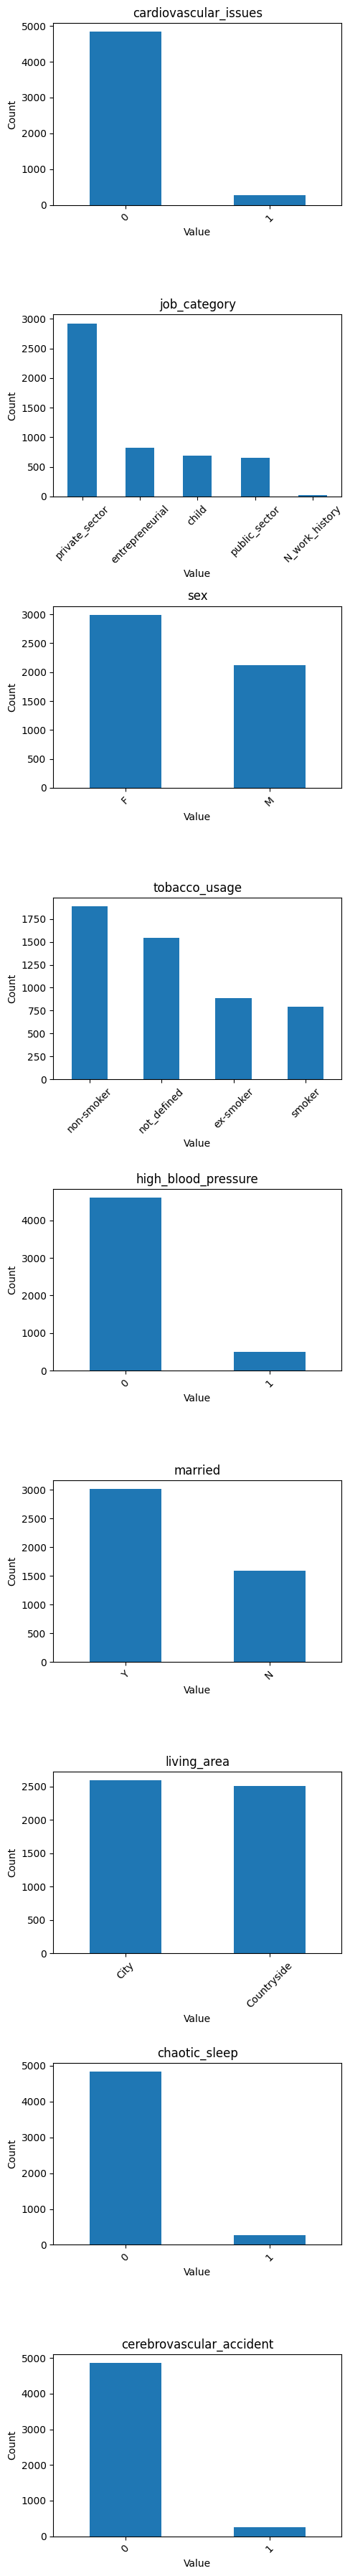

In [9]:

plot_category_features(full_data, category_features)